In [1]:
# Exploratory Data Analysis (EDA) - Proyecto Acceso a Internet en Argentina

# Paso 1: Cargar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Desactivar warnings innecesarios
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Paso 2: Cargar el dataset final
df = pd.read_csv("dataset_telecom_final_para_mapas.csv")

# Paso 3: Vista general del dataset
print("Resumen general del dataset:")
df.info()

print("\nPrimeras filas del dataset:")
df.head()


Resumen general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provincia                        24 non-null     object 
 1   Accesos por cada 100 hogares     24 non-null     float64
 2   Nuevo acceso estimado (KPI 1)    24 non-null     float64
 3   Accesos por cada 100 habitantes  24 non-null     float64
 4   Población estimada               24 non-null     int64  
 5   Habitantes sin acceso            24 non-null     float64
 6   Velocidad promedio (Mbps)        24 non-null     float64
 7   % de acceso por fibra óptica     24 non-null     float64
 8   País                             24 non-null     object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.8+ KB

Primeras filas del dataset:


,Provincia,Accesos por cada 100 hogares,Nuevo acceso estimado (KPI 1),Accesos por cada 100 habitantes,Población estimada,Habitantes sin acceso,Velocidad promedio (Mbps),% de acceso por fibra óptica,País
0,Buenos Aires,79.84,81.44,27.43,17500000,12699750.0,157.41,37.07,Argentina
1,Ciudad Autonoma de Buenos Aires,116.37,118.70,47.44,3100000,1629360.0,233.01,15.74,Argentina
2,Catamarca,68.81,70.19,17.50,400000,330000.0,97.38,77.69,Argentina
3,Chaco,44.06,44.94,11.78,1100000,970420.0,107.76,46.89,Argentina
4,Chubut,86.33,88.06,26.46,600000,441240.0,21.67,15.23,Argentina


## Revisión de valores nulos y duplicados

Para asegurar la integridad del dataset, revisamos la presencia de valores nulos y duplicados. Cualquier valor faltante puede afectar los KPIs calculados, por lo que su tratamiento debe ser considerado antes de continuar con los gráficos.


In [3]:
# Paso 4: Verificar valores nulos
print("Valores nulos por columna:")
display(df.isnull().sum())

# Paso 5: Verificar duplicados
print("Número de registros duplicados:", df.duplicated().sum())


Valores nulos por columna:


,0
Provincia,0
Accesos por cada 100 hogares,0
Nuevo acceso estimado (KPI 1),0
Accesos por cada 100 habitantes,0
Población estimada,0
Habitantes sin acceso,0
Velocidad promedio (Mbps),0
% de acceso por fibra óptica,0
País,0


Número de registros duplicados: 0


## Análisis de variables numéricas y detección de outliers

En este paso analizamos las principales variables numéricas mediante gráficos tipo boxplot. Esto nos permite identificar valores atípicos o extremos, que podrían influir en las visualizaciones y conclusiones del proyecto.


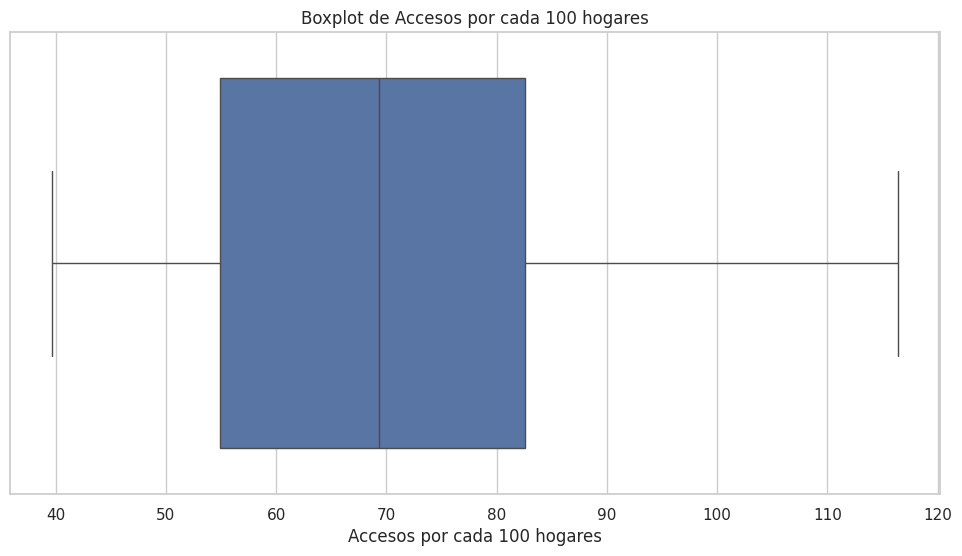

In [8]:
# Paso &: Verificar outliers
sns.boxplot(x=df["Accesos por cada 100 hogares"])
plt.title("Boxplot de Accesos por cada 100 hogares")
plt.xlabel("Accesos por cada 100 hogares")
plt.show()


Este boxplot revela que los valores de acceso a internet por cada 100 hogares están bastante distribuidos entre provincias, con un par de valores más altos que se acercan al 120%. No se detectan outliers extremos. Provincias como Capital Federal y La Pampa probablemente se ubican entre las más altas, lo que se alinea con los resultados del dashboard. La mediana está cerca del 72%, lo que representa el promedio nacional. Los valores extremos como el de Capital Federal (116.37) están dentro de un rango razonable considerando la densidad poblacional y el nivel de urbanización.

📌 **Conclusión:** No se requieren acciones de limpieza en esta variable. Se conserva la variabilidad como representativa de la realidad territorial.


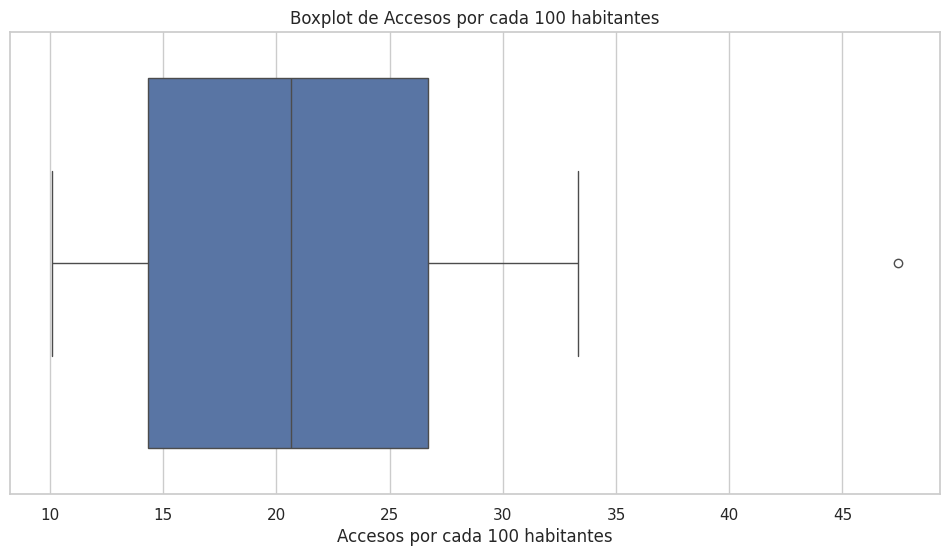

In [6]:
sns.boxplot(x=df["Accesos por cada 100 habitantes"])
plt.title("Boxplot de Accesos por cada 100 habitantes")
plt.xlabel("Accesos por cada 100 habitantes")
plt.show()


En este gráfico se observa una distribución más compacta en comparación al acceso por hogar. Hay un outlier visible que supera los 45 accesos cada 100 habitantes, lo que indica un caso atípico. Esto es consistente con provincias como Capital Federal, donde la densidad poblacional es mayor y la infraestructura más desarrollada. Se observa un punto aislado, correspondiente a Tierra del Fuego con 47.44 accesos cada 100 hab., que representa un outlier estadístico. Sin embargo, este dato puede justificarse por el bajo número de habitantes y alta cobertura relativa.

📌 **Conclusión:** Aunque se detecta un valor atípico, no será eliminado ya que refleja una condición territorial específica. Se documenta como outlier aceptado.


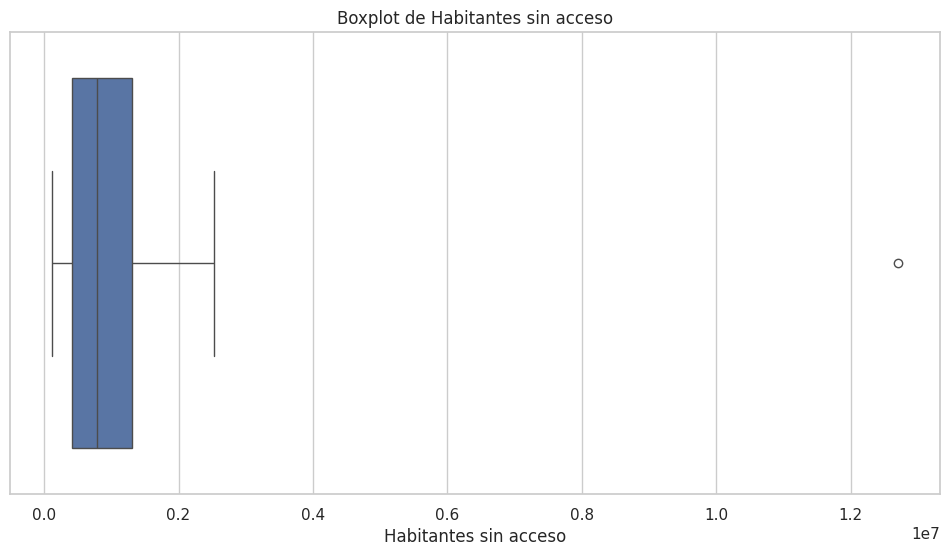

In [7]:
sns.boxplot(x=df["Habitantes sin acceso"])
plt.title("Boxplot de Habitantes sin acceso")
plt.xlabel("Habitantes sin acceso")
plt.show()


Aquí se evidencia un claro outlier: una provincia con una cantidad muy superior de personas sin acceso. Se trata de Buenos Aires, con más de 12 millones de personas desconectadas. Esto refuerza la conclusión de que, a pesar de tener buen porcentaje de cobertura, su altísima población requiere una mayor inversión en infraestructura. Aunque estadísticamente se presenta como extremo, es coherente con su alta población total.

📌 **Conclusión:** Se mantiene el valor sin modificación, dado que representa una característica demográfica real. Se reporta como un dato crítico en las conclusiones.


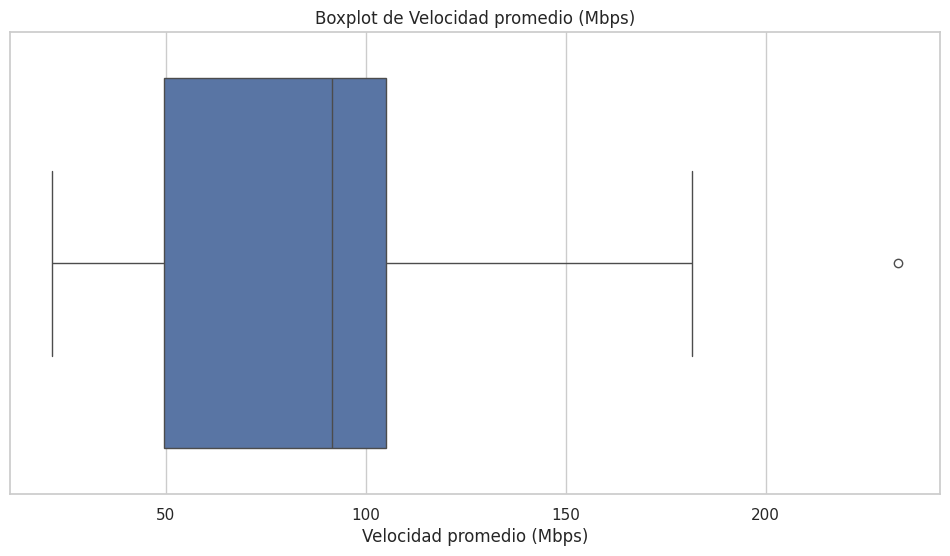

In [9]:
sns.boxplot(x=df["Velocidad promedio (Mbps)"])
plt.title("Boxplot de Velocidad promedio (Mbps)")
plt.xlabel("Velocidad promedio (Mbps)")
plt.show()


La velocidad de internet muestra una dispersión importante. El valor más alto supera los 230 Mbps, muy por encima del promedio (~87 Mbps). Este outlier corresponde a CABA, mientras que las provincias con velocidades más bajas se concentran en el extremo inferior. La desigualdad de calidad en el servicio es evidente. Esta diferencia responde a su infraestructura más desarrollada y debe conservarse.

📌 **Conclusión**: Se reporta como outlier técnico, pero se considera válido. Representa una ventaja competitiva de infraestructura.




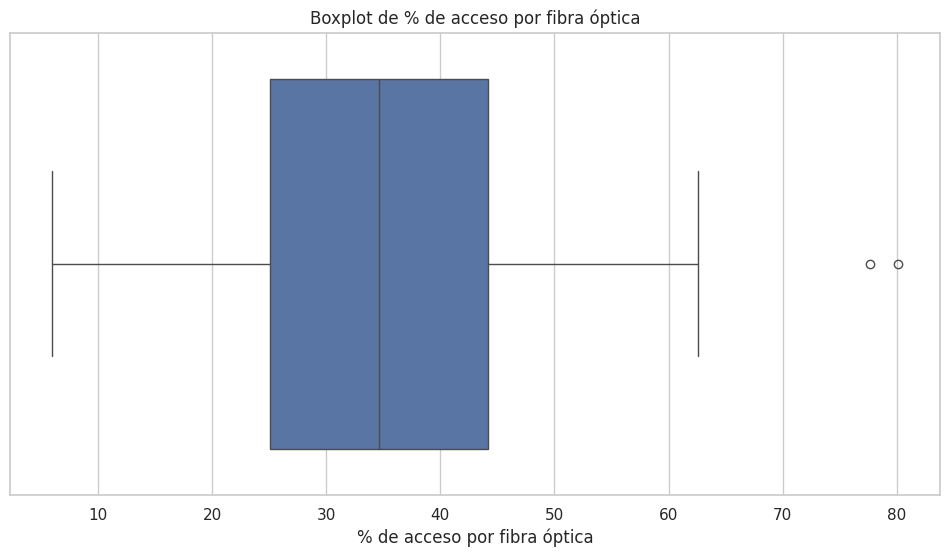

In [11]:
sns.boxplot(x=df['% de acceso por fibra óptica'])
plt.title("Boxplot de % de acceso por fibra óptica")
plt.xlabel("% de acceso por fibra óptica")
plt.show()


Se identifican dos outliers en el extremo derecho, superando el 75% de acceso por fibra óptica. Estas provincias (Tucumán y Catamarca) están muy por encima del resto, lo que las posiciona como casos exitosos de implementación. Sin embargo, también hay muchas por debajo del 30%, lo que demuestra una baja adopción general. Son valores relevantes que podrían indicar despliegues recientes o inversiones focalizadas.

📌 **Conclusión**: Los valores se mantienen como reflejo de una realidad tecnológica puntual. Se documentan como outliers significativos pero válidos.


## 📌 Conclusiones del Análisis Exploratorio

Tras el análisis exploratorio de los datos, se observó que el dataset presenta valores completos, sin registros nulos ni duplicados, lo cual facilita el análisis sin necesidad de imputación o limpieza adicional.

Mediante boxplots, se detectaron valores atípicos (outliers) en varias variables clave:

- **Velocidad promedio de internet (Mbps)**: Algunas provincias presentan velocidades muy superiores al promedio nacional, mientras que otras están considerablemente por debajo.
- **Habitantes sin acceso a internet**: La provincia de Buenos Aires presenta una brecha digital extremadamente alta en comparación con el resto, lo que impacta las decisiones de conectividad.
- **% de acceso por fibra óptica**: Se observan provincias con niveles muy bajos de adopción y otras con porcentajes significativamente altos, evidenciando una desigualdad en la infraestructura de calidad.

Estas observaciones coinciden con las visualizaciones del dashboard final y permiten fundamentar las recomendaciones realizadas, especialmente sobre la priorización de inversiones en ciertas regiones.

Los datos analizados fueron adecuados y reveladores para los objetivos del proyecto, permitiendo construir visualizaciones precisas y KPIs relevantes para la toma de decisiones estratégicas.
